In [6]:
# Шаг 6_9_1

# Группировка таблиц Pandas DataFrame

# Авторы урока - Задойный Алексей, Александр Павлов

# Потребность в группировке данных вполне очевидна и иллюстрируется, например, ситуацией, когда у вас есть список всех студентов с указанием их групп и оценками, а вы хотите узнать «средний балл» для каждой группы (или журнал со списком оценок учеников за четверть и вы хотите получить среднюю оценку для выставления четвертной).

# Такую задачу можно легко решить «в лоб» с помощью прохождения по всему массиву данных в цикле (однако, мы уже знаем, что циклы for в python довольно медленные, а векторные операции в питире быстрые).

# Поэтому в Pandas есть специальная функция groupby.

# В простейшем случае использование этой функции можно разделить на 3 этапа:

# 1. Фильтрация
# 2. Группировка
# 3. Применение итоговой функции

# Рассмотрим на примере со студентами (students.csv в приложении):
import pandas as pd
from pandas.conftest import ordered

df = pd.read_csv('students.csv')
df

# 1. Фильтрация

# На этом этапе мы должны взять из фрейма только ту часть, которая будет использоваться для группировки, т.е. только столбцы двух видов:
# • Виды групп (в случае со студентами это в прямом смысле группы)
# • То, к чему мы будем применять итоговую функцию, то что мы будем изучать по группам (в нашем случае оценки)

df[['Group', 'Mark']]

# 2. Группировка

# Вызываем метод groupby() датафрейма, в качестве аргумента которого передаём список названий колонок, которые используем для группировки (в нашем случае список из одного значения – колонки, где хранятся названия групп)

df[['Group', 'Mark']].groupby(['Group'])

# 3. Применение итоговой функции

# Вызываем метод (в нашем случае для вычисления среднего), который будет применён к каждой группе.

# Важно учитывать, что этот метод будет применяться к тем, колонкам, которые НЕ перечислены в группировке (в нашем случае к колонкам с оценками).

# Примеры часто используемых методов:
# • mean() – среднее
# • sum() – сумма
# • count() – подсчёт количества элементов
# • min()/max() – минимальное/максимальное значение
# • median() – медиана
# • другие методы - https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats

df[['Group', 'Mark']].groupby(['Group']).mean() # Среднее

# Это самый простой пример использования группировок в Pandas.


,Mark
Group,
А,4.000000
Б,4.333333


In [2]:
import pandas as pd
df = pd.read_csv('students.csv')
df

,Lastname,Group,Mark
0,Иванов,А,5
1,Петров,А,4
2,Сидоров,А,3
3,Кузнецов,Б,5
4,Попов,Б,4
5,Смирнов,Б,4


In [3]:
# Количество уникальных элементов
df[['Group', 'Mark']].groupby(['Group']).nunique()

,Mark
Group,
А,3
Б,2


In [20]:
df.groupby(['Group'])[['Mark']].mean() #Одни квадратные скобки для 'Mark' выведут сразу вывод на печать,
# двойные квадратные скобки - "шахматный датафрейм"

,Mark
Group,
А,4.000000
Б,4.333333


In [8]:
# Шаг 6_9_2

# В файле torg.csv представлена выгрузка со склада интернет-магазина.

# Обратите внимание на нестандартный разделитель!

# Товаров какого цвета больше всего на складе?

# Примечание. Ответом к задаче является цвет, а не код.

import pandas as pd
df = pd.read_csv('torg.csv', sep = ';')
df

,IE_XML_ID,IE_NAME,IP_PROP30,IP_PROP31,IP_PROP32,CP_QUANTITY,CR_PRICE_1_USD
0,179,Штаны Полосатый Рейс,purple,NaN,L,99,29.06
1,181,Штаны Полосатый Рейс,purple,NaN,XL,100,29.06
2,182,Штаны Полосатый Рейс,purple,NaN,XS,100,29.06
3,183,Штаны Полосатый Рейс,purple,NaN,M,100,29.06
4,184,Штаны Полосатый Рейс,purple,NaN,S,100,29.06
...,...,...,...,...,...,...,...
270,639,Ремень Грубая Кожа,brown,NaN,L,100,10.39
271,641,Ремень Грубая Кожа,brown,NaN,XL,100,10.39
272,642,Ремень Грубая Кожа,brown,NaN,XS,100,10.39
273,643,Ремень Грубая Кожа,brown,NaN,M,100,10.39


In [45]:
# Тут нужно решать немножко "не в лоб"
df[['IP_PROP30', 'CP_QUANTITY']].groupby('IP_PROP30')['CP_QUANTITY'].sum().sort_values(ascending = False)

IP_PROP30
black        5000
white        4999
brown        3500
red          2497
purple       2199
pink         2000
blue         1800
green        1499
see          1000
azure         500
flowers       500
jeans         500
redblue       499
orangered     498
Name: CP_QUANTITY, dtype: int64

In [61]:
# Шаг 6_9_3

# В файле torg.csv представлена выгрузка со склада интернет-магазина.

# Сгруппируйте размеры представленных товаров по суммарному количеству единиц товара на складе.

# Учитывайте, что результат группировки (после применения итоговой функции) - обычный датафрейм, т.е. к нему применимы все обычные функции, например, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

# Отсортируйте размеры по увеличению остатков на складе.

# Если товаров одного размера одинаковое количество, то размеры сортируются "лексикографически" (да, мы не будем морочиться)

import pandas as pd

df = pd.read_csv('torg.csv', sep = ';')
df

print(df[['IP_PROP32', 'CP_QUANTITY']].groupby('IP_PROP32')['CP_QUANTITY'].sum().sort_values(ascending = True))

IP_PROP32
M     4198
S     4198
XS    4299
L     4397
XL    4399
Name: CP_QUANTITY, dtype: int64


In [62]:
print(df.groupby('IP_PROP32')['CP_QUANTITY'].sum().sort_values(ascending = True))

IP_PROP32
M     4198
S     4198
XS    4299
L     4397
XL    4399
Name: CP_QUANTITY, dtype: int64


In [ ]:
# Шаг 6_9_4

# А что будет, если опустить этап фильтрации?

# В нашем конкретном случае ничего страшного не случится:

import pandas as pd
df = pd.read_csv('students.csv')
df.groupby(['Group']).mean()

# Однако, если бы наши данные были чуть сложнее (например, датасет CSV содержал бы внутренний ID студента в базе данных института), то можно было бы нарваться на такой казус:

import pandas as pd
df_with_ID = pd.read_csv('students_with_ID.csv')
df_with_ID

df_with_ID.groupby(['Group']).mean()

# Почему так происходит, что в одном случае никакого мусора не вылезло, а в другом появилась лишняя колонка?
# Всё дело в том, что применяемая функция пытается примениться ко всем колонкам, которые не переданы в группировку. Но как найти среднее для фамилии, которые представлены строками? Никак. Вот умная библиотека и отбрасывает лишнюю колонку.

# A ID в данном случае тоже числа, для чисел операция взятия среднего определена, поэтому мы и нашли "средний" ID для каждой группы (мне кажется, довольно бесполезная величина).

# Можно ли поменять местами этапы?

# Да, можно поменять местами этап фильтрации и группировки.

# Но следует учитывать, что если вы фильтруете ДО группировки, то необходимо указать все участвующие столбцы (и те, что группируют и те, что используются для функции), а если ПОСЛЕ, то только те, что используются функцией.

df.groupby(['Group'])['Mark'].mean()
# эквивалентно
df[['Group', 'Mark']].groupby(['Group']).mean()

df.groupby(['Group'])[['Mark']].mean()

df[['Group', 'Mark']].groupby(['Group']).mean()


In [ ]:
# Шаг 6_9_5

# А что за "объект" мы получили после применения метода groupby?

# Об объектах в целом мы поговорим в уроке про ООП.

# Но уже сейчас можно заметить, что этот "объект" умеет итерироваться, т.е. по его элементам можно пройтись в цикле:

import pandas as pd
df = pd.read_csv('students.csv')
df.groupby(['Group'])

for element in df.groupby(['Group']):
    print(type(element))
    print(element)
    print()

# Как видно внутри у него содержатся кортежи (tuple).

# Причём первый элемент кортежа - это всегда индекс в нашей будущей группировке, а второй... Если присмотреться ко второму, то окажется, что это Датафрейм, вырезанный из исходного так, чтобы в группируемом столбце было всегда одно и то же значение.

type(element[1])
element[1]

# Это приводит к очень важному (хотя и очевидному) выводу:

# Нельзя сгруппировать по тому, чего нет

# Поясним на примере.
# Предположим, у вас есть лог каких-то событий с указанием даты. Вы хотите сгруппировать их по датам и узнать сколько событий произошло в какой день.

# Если в какой-то день НЕ ПРОИЗОШЛО ни одного события, то у вас просто не будет ни одной записи с этой датой, а значит, в итоговой группировке, не будет точки со значением "0 событий" в эту дату.

# Почему это опасно?
# 1. Если вы строите график по точкам, то в указанную дату должен быть провал до 0, однако вы его не увидите, а просто соедините соседние точки (и если масштаб достаточно мал, то не заметите этого).
# 2. Если вы вычисляете среднее по нескольким таким значениям (например, сколько в среднем событий происходит по понедельникам), то вы неверно учтёте количество событий и исказите среднее (это справедливо и для других вычисляемых величин).



In [ ]:
# Шаг 6_9_6

# Можно ли сделать группировку по 2 (3/4/...) полям?

# Предположим, что в наш институт перевели несколько девушек в те же самые группы. И нам интересно узнать данные о средней успеваемости не только в разрезе групп, но и в разрезе пола (как бы неполиткорректно это не звучало, но мы хотим проверить гипотезу о том, что девушки более прилежные и лучше учатся).

import pandas as pd
df = pd.read_csv('students_with_sex.csv')
df

# Алгоритм остаётся прежним, просто на этапе группировки передаём список строк с названиями всех колонок, по которым мы хотим группировать данные:

df.groupby(['Group', 'sex']).mean()


In [ ]:
# Шаг 6_9_7

# Может возникнуть вопрос "а почему" результат выглядит так странно? Названия колонок явно "сдвинуты" по вертикали:

df.groupby(['Group', 'sex']).mean()

# В этом легко убедиться с помощью простого трюка, присвоив какое-нибудь имя колонке индексов обычного датафрейма:

import pandas as pd
df = pd.read_csv('students_with_sex.csv')
df

df.index.names = ['!!!']
df

# Но тогда какие же индексы у строк?
# Обычные индексы-кортежи, т.е. пары из двух колонок 'Group' и 'sex':

group = df.groupby(['Group', 'sex']).mean()
group

group.loc[('A', 'ж'),]

group.loc[('A', 'ж')]

# Как привести такой датафрейм к привычному виду?
# Можно использовать метод reset_index() - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

group.reset_index()

# Другой способ убрать индексы - это сразу не тащить их в группировку с помощью атрибута as_index:

df.groupby(['Group', 'sex'], as_index=False).mean()



In [1]:
# Шаг 6_9_8

# В этом задании представлена выгрузка складских остатков (выгрузка отличается от ранее представленной тем, что при каждом решении генерируется новая выгрузка из 200 позиций).

# Найдите суммарную стоимость всех розовых (pink) вещей большого размера (XL).

# Учитывайте, что цена указана за 1 единицу товара.

# У вас есть неограниченное число попыток.
# Время одной попытки: 5 mins

import pandas as pd
df = pd.read_csv('dataset_345422_8.txt', sep = ';')
df2 = df[['IP_PROP30', 'IP_PROP32', 'CR_PRICE_1_USD']].groupby(['IP_PROP30', 'IP_PROP32']).sum()
df3 = df2.loc[('pink', 'XL')]
print(df3.iloc[0].astype(float))
# Ответ не принимается ни в каком варианте, хотя он верный

60.46


In [38]:
# Записи для себя:
df4 = df[['IP_PROP30', 'IP_PROP32', 'CR_PRICE_1_USD']].groupby(['IP_PROP30', 'IP_PROP32']).count()
df5 = df4.loc['pink', 'XL']
df5.iloc[0].astype(int)


np.int64(3)

In [ ]:
# Шаг 6_9_9

# Визуализация

# Как и у любого датафрейма, у группировки есть метод plot(), который позволяет построить график или гистограмму с помощью Matplotlib.

# Главное помнить о важном принципе - нельзя сгруппировать по тому, чего нет.

# Рассмотрим в качестве примера выгрузку лога неких событий.

# Легко заметить 2 особенности:
# • Разделителем является символ ";"
# • Колонка IP_PROP5562 содержит дату и время, однако, этот формат записи не ISO 8601 и не стандартный формат, который распознает Pandas.

# Поэтому сразу напишем простую функцию, с помощью модуля https://docs.python.org/3/library/datetime.html для парсинга даты:

import pandas as pd
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M:%S')
source_data = pd.read_csv('export.csv', sep=';', parse_dates=['IP_PROP5562'], date_parser=dateparse)
source_data.head()

# Объекты типа datetime могут быть легко приведены к типу date (т.е. можно отбросить время) с помощью метода date(), рассмотрим это на конкретной 0-й записи:

source_data['IP_PROP5562'][0].date()

# Это значит, что можно написать функцию, применив которую к каждому элементу колонки, можно получить колонку только из дат.
# Мы напишем лямбда функцию (можете заменить её обычной) и используем её в методе map (метод работа которого для датафрейма аналогично обычной функции map):

source_data['IP_PROP5562'].map(lambda x: x.date())

# Альтернативный вариант.
# # можно прочитать файл как обычно
# source_data = pd.read_csv('export_data.csv', sep=';')
# # и преобразовать колонку с датой и временем методами самого пандаса без лямбды и парсинга даты при чтении файла
# source_data['IP_PROP5562'] = pd.to_datetime(source_data['IP_PROP5562'], format='%d.%m.%Y %H:%M:%S')
# # и дату можно получить тоже без лямбды, т.е. через метод datetime самого пандаса
# source_data['date'] = source_data['IP_PROP5562'].dt.date

# Сложим эти данные в новую колонку и сгруппируем данные:

source_data['date'] = source_data['IP_PROP5562'].map(lambda x: x.date())
source_data.head()

source_data[['date', 'IE_ID']].groupby('date').count()

# Обратите внимание, мы используем метод count() для подсчёта количества записей в каждой группе.

# Наконец, используем метод plot для построения гистограммы:

source_data[['date', 'IE_ID']].groupby('date').count().plot(kind='bar', figsize=(13,8))

# Обратите внимание на выделенные красным интервалы - там происходит скачок "через день", т.к. в некоторые дни событий не было.

# Нельзя сгруппировать по тому, чего нет

In [48]:
import pandas as pd
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y %H.%M.%S')
source_data = pd.read_csv('export.csv', sep = ';', parse_dates = ['IP_PROP5562'], date_parser = dateparse)
source_data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5424\2933992933.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  source_data = pd.read_csv('export.csv', sep = ';', parse_dates = ['IP_PROP5562'], date_parser = dateparse)


ValueError: time data '17.10.2019 11:17:17' does not match format '%d.%m.%Y %H.%M.%S'

In [14]:
source_data['IP_PROP5562'].map(lambda x: x.date())

0       2019-10-17
1       2019-10-17
2       2019-10-17
3       2019-10-17
4       2019-10-17
           ...    
4068    2019-11-07
4069    2019-11-07
4070    2019-11-07
4071    2019-11-07
4072    2019-11-08
Name: IP_PROP5562, Length: 4073, dtype: object

In [16]:
source_data['date'] = source_data['IP_PROP5562'].map(lambda x: x.date())
source_data.head()

,IE_ID,IP_PROP5562,date
0,720251,2019-10-17 11:17:17,2019-10-17
1,720250,2019-10-17 11:09:32,2019-10-17
2,720255,2019-10-17 12:04:34,2019-10-17
3,720257,2019-10-17 12:17:11,2019-10-17
4,720258,2019-10-17 12:40:07,2019-10-17


In [22]:
source_data[['date', 'IE_ID']].groupby('date').count()

,IE_ID
date,
2019-08-29,8
2019-08-30,8
2019-08-31,1
2019-09-02,12
2019-09-03,8
...,...
2019-11-04,36
2019-11-05,103
2019-11-06,106


<Axes: xlabel='date'>

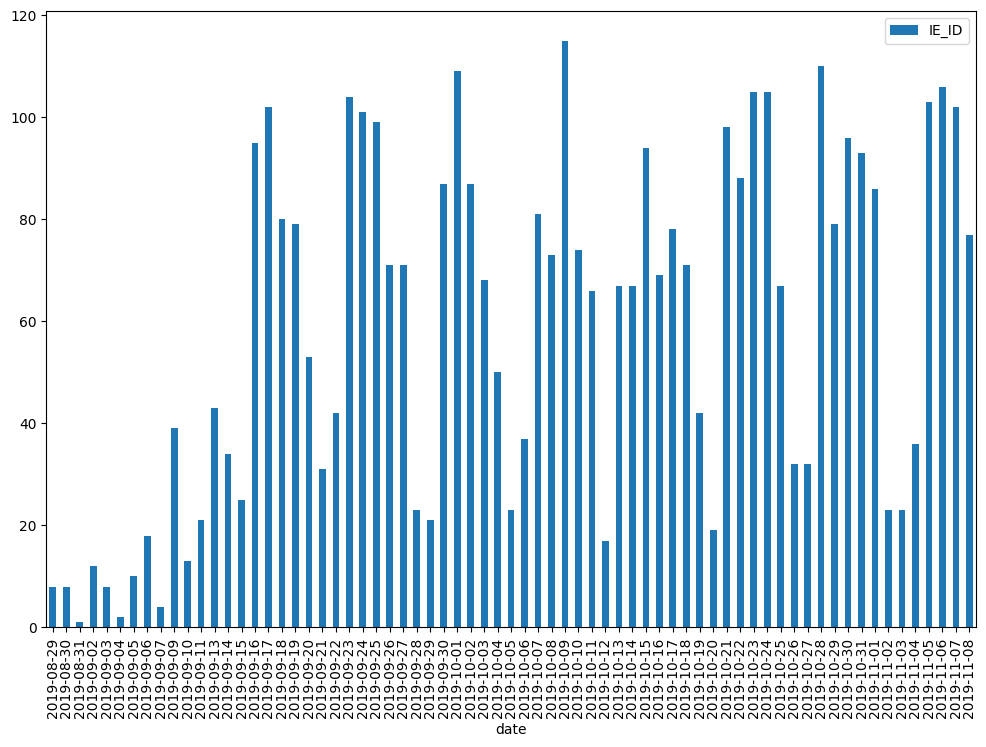

In [47]:
source_data[['date', 'IE_ID']].groupby('date').count().plot(kind = 'bar', figsize = (12,8))

In [ ]:
# Шаг 6_9_10

# Агрегирующая функция

# Иногда нужно что-то более сложное или более комплексное, чем просто найти среднее или посчитать количество элементов в каждой группе.

# Тогда на помощь приходит функция aggregate - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html

# Рассмотрим на том же примере студентов:

import pandas as pd
df = pd.read_csv('students_with_ID.csv')
df

# Просто применим aggregate к группировке и в качестве аргумента передаём функцию, например, min (для вычисления минимума):

df.groupby(['Group']).aggregate(min)

# В результате наша функция применилась ко всем колонкам (это немного странно найти "минимальную" фамилию, но как мы помним, сравнение строк происходит лексикографически, т.е. по индексу символов в таблице символов).

# Это минимальный пример. Дальше интереснее.

# Давайте передадим в качестве аргумента в агрегирующую функцию список функций. Каждая из них применяется к каждому столбцу.

df.groupby(['Group']).aggregate([min, max])

# Теперь давайте научим нашу агрегирующую функцию применять свои силы к конкретной колонке.

# Для этого в качестве аргумента передадим словарь:
# • ключи - имена колонок на которые воздействовать
# • значения - списки функций для воздействия на колонки

df.groupby(['Group']).aggregate({'Mark':[min, max]})

# И наконец, раз мы передаём функции, то почему бы не передать свою собственную функцию?

# При написании функции важно помнить, что она будет применяться к колонке, т.е. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

# Давайте напишем функцию, которая будет возвращать число студентов с оценками больше 3, т.е. тех, кто претендует на стипендию:

def grants_count(col):
    return col[col > 3].count()

df.groupby(['Group']).aggregate({'Mark':[min, max, grants_count]})

# Имена функций в кавычках

# Есть некоторая хитрость. Мы уже пользовались методом count() и знаем, что он работает. Попробуем передать его агрегирующей функции:

df.groupby(['Group']).aggregate({'Mark':[min, max, grants_count, count]})

# NameError: name 'count' is not defined

# Дело в том, что функции "count" не существует. Но у колонок Pandas есть такой "метод". В чём разница между методом и функцией мы ещё поговорим в уроке про ООП, сейчас для нас разница в применении:

col.min() # метод min
min(col)  # функция min

# В этом примере мы применяем метод и функцию к одной и той же колонке, отличается синтаксис. Это очень грубо. Но на данном этапе нам этого хватит.

# Так вот, имена методов надо передавать в кавычках:

df.groupby(['Group']).aggregate({'Mark':[min, max, grants_count, 'count']})

# # НЕ правильно
# df.groupby(['Group']).aggregate({'Mark':[min, max, grants_count, count]})
# # правильно
# df.groupby(['Group']).aggregate({'Mark':[min, max, grants_count, 'count']})



In [50]:
import pandas as pd
df = pd.read_csv('students_with_ID.csv')
df

,Lastname,Group,Mark,ID
0,Иванов,А,5,665
1,Петров,А,4,666
2,Сидоров,А,3,667
3,Кузнецов,Б,5,668
4,Попов,Б,4,669
5,Смирнов,Б,4,670


In [65]:
# Фунцкии лучше сразу взять в кавычки, чтобы не было предупреждений:
df.groupby(['Group']).aggregate('min')

,Lastname,Mark,ID
Group,,,
А,Иванов,3,665
Б,Кузнецов,4,668


In [66]:
df.groupby(['Group']).aggregate(['min','max'])

Lastname          Mark       ID     
            min      max  min max  min  max
Group                                      
А        Иванов  Сидоров    3   5  665  667
Б      Кузнецов  Смирнов    4   5  668  670

In [67]:
df.groupby(['Group']).aggregate({'Mark': ['min', 'max']})

Mark    
       min max
Group         
А        3   5
Б        4   5

In [68]:
def grants_count(col):
    return col[col > 3].count()

df.groupby(['Group']).aggregate({'Mark' : ['min', 'max', grants_count]})

Mark                 
       min max grants_count
Group                      
А        3   5            2
Б        4   5            3

In [64]:
df.groupby(['Group']).aggregate({'Mark': ['min', 'max', grants_count, 'count']})

Mark                       
       min max grants_count count
Group                            
А        3   5            2     3
Б        4   5            3     3